<a href="https://colab.research.google.com/github/Belal-AI/CNN_Model_Transfer_learning/blob/main/deepLearningnootbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import  cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator 


In [3]:
path_train_cats="/content/drive/MyDrive/AmitAI3/dataset/training_set/cats"
path_train_dogs="/content/drive/MyDrive/AmitAI3/dataset/training_set/dogs"

In [4]:
def get_images(path):
  images=os.listdir(path)
  list_of_images=[]
  for i in images:
    list_of_images.append(cv2.imread(path+'/'+i))
  return list_of_images


In [5]:
cats_images=get_images(path_train_cats)

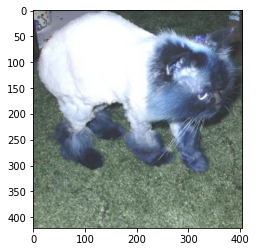

In [6]:
plt.imshow(cats_images[0])

In [7]:
dogs_images=get_images(path_train_dogs)

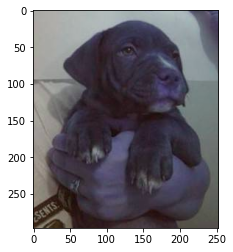

In [8]:
plt.imshow(dogs_images[0])

In [9]:
print(len(cats_images),len(dogs_images))

4000 4000


In [10]:
def resizeimage(image):
  img=cv2.resize(image,(168, 192))
  return img

In [11]:
cats_images_resized=[]
for i in cats_images:
  cats_images_resized.append(resizeimage(i))


In [12]:
dogs_images_resized=[]
for i in dogs_images:
  dogs_images_resized.append(resizeimage(i))


In [13]:
def predata():
  data=[]
  labels=[]
  for i in range(len(dogs_images_resized)):
    data.append(dogs_images_resized[i])
    data.append(cats_images_resized[i])
    labels.append(1)
    labels.append(0)
  return labels,data

    

In [14]:
labels,data=predata()

In [15]:
len(labels)

8000

In [16]:
data[0].shape

(192, 168, 3)

In [17]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.applications  import VGG16
from tensorflow.keras import Model

In [18]:
transferdmodel=VGG16(include_top=False,weights='imagenet',input_shape=(192, 168, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [19]:
for i in transferdmodel.layers:
  i.trainable=False
  

In [20]:
transferdmodel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 192, 168, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 192, 168, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 192, 168, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 96, 84, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 96, 84, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 96, 84, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 48, 42, 128)       0     

In [21]:
transferdmodel.output

<KerasTensor: shape=(None, 6, 5, 512) dtype=float32 (created by layer 'block5_pool')>

In [22]:
model=transferdmodel.output
model=Flatten()(model)
model=Dense(32,activation='relu')(model)
model=Dense(1,activation='sigmoid')(model)
model=Model(transferdmodel.input,model)

In [23]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
traingenrator=ImageDataGenerator(rotation_range=35,rescale=True,vertical_flip=True,)
testing=ImageDataGenerator()

In [25]:
traingenrator=traingenrator.flow(np.array(data),np.array(labels).reshape(-1,1))

In [26]:
testing=testing.flow(np.array(data[:1000]),np.array(labels[:1000]).reshape(-1,1))

In [27]:
model.fit(traingenrator,validation_data=testing,epochs=2,steps_per_epoch=50)

Epoch 1/2
50/50 [==============================] - 851s 17s/step - loss: 2.4300 - accuracy: 0.6700 - val_loss: 0.2525 - val_accuracy: 0.9190
Epoch 2/2
50/50 [==============================] - 851s 17s/step - loss: 0.3824 - accuracy: 0.8737 - val_loss: 0.1831 - val_accuracy: 0.9330


In [32]:
model.save("model.h5")



*   **we can pick the best version of the model through the training based on validation accuracy **
*   by some callbalckes techniques which is ModelChclpoint and pass save_best_only 
*  its like creatine early stopping point its help to store the best version after each epoc 
i.e

1. epoc1 acc 90 val_acc 80

2.  epoc2 acc 89 val_acc 90

 **3. epoc3 acc 91 val_acc 95** -> so its the best epoch and peformance of the model so it saved immediately

*checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True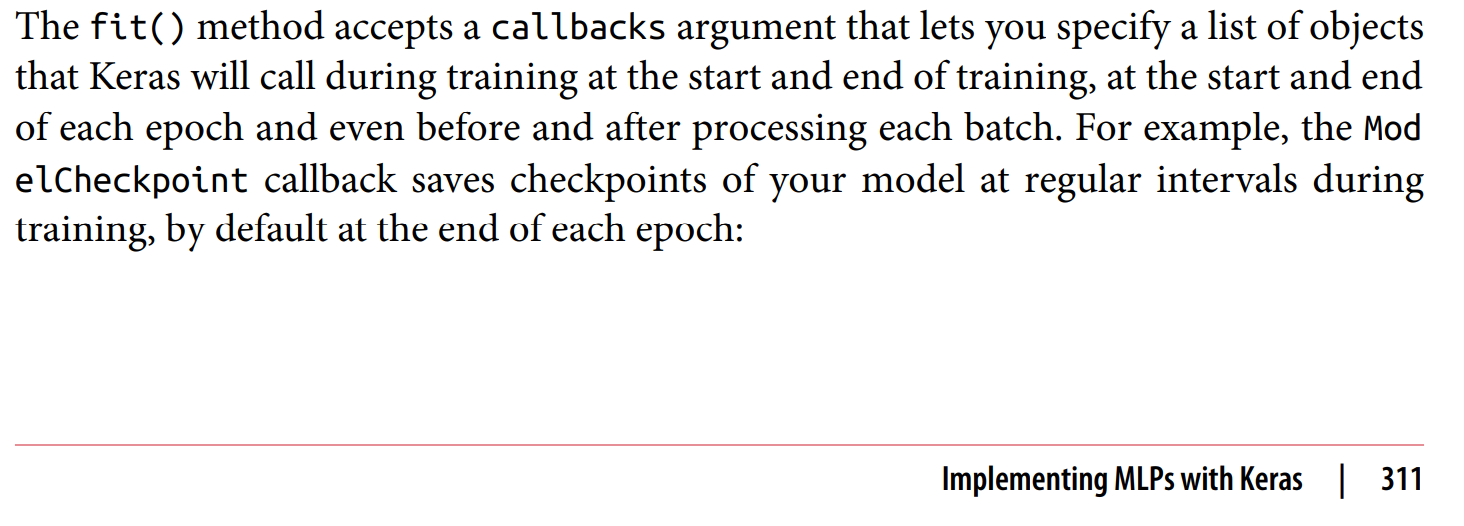*


In [34]:
modelcheckpoit=tf.keras.callbacks.ModelCheckpoint(filepath="/content/model.h5",save_best_only=True)

In [38]:
model.fit(traingenrator,validation_data=testing,epochs=2,steps_per_epoch=50,callbacks=[modelcheckpoit],verbose=1)

Epoch 1/2
50/50 [==============================] - 858s 17s/step - loss: 0.3277 - accuracy: 0.8938 - val_loss: 0.2190 - val_accuracy: 0.9440
Epoch 2/2
50/50 [==============================] - 854s 17s/step - loss: 0.2610 - accuracy: 0.9087 - val_loss: 0.1462 - val_accuracy: 0.9440


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
